In [26]:
from sympy import Symbol, Eq, Abs

import modulus
import modulus.sym
from modulus.sym.hydra import to_absolute_path, instantiate_arch, ModulusConfig
from modulus.sym.solver import Solver
from modulus.sym.domain import Domain
from modulus.sym.geometry.primitives_2d import Rectangle
from modulus.sym.domain.constraint import (
    PointwiseBoundaryConstraint,
    PointwiseInteriorConstraint,
)
from modulus.sym.domain.validator import PointwiseValidator
from modulus.sym.domain.inferencer import PointwiseInferencer
from modulus.sym.key import Key
from modulus.sym.eq.pdes.navier_stokes import NavierStokes
from modulus.sym.utils.io import (
    csv_to_dict,
    ValidatorPlotter,
    InferencerPlotter,
)

In [27]:
# make list of nodes to unroll graph on
ns = NavierStokes(nu=0.01, rho=1.0, dim=2, time=False)

from modulus.sym.hydra import to_yaml
from modulus.sym.hydra.config import ModulusConfig

@modulus.sym.main(config_path="conf", config_name="config")
def run_config(cfg: ModulusConfig) -> None:
    print(to_yaml(cfg))
    return cfg

cfg = run_config()
flow_net = instantiate_arch(
    input_keys=[Key("x"), Key("y")],
    output_keys=[Key("u"), Key("v"), Key("p")],
    cfg=cfg.arch.fully_connected,
)
nodes = ns.make_nodes() + [flow_net.make_node(name="flow_network")]

usage: ipykernel_launcher.py [--help] [--hydra-help] [--version]
                             [--cfg {job,hydra,all}] [--resolve]
                             [--package PACKAGE] [--run] [--multirun]
                             [--shell-completion] [--config-path CONFIG_PATH]
                             [--config-name CONFIG_NAME]
                             [--config-dir CONFIG_DIR]
                             [--experimental-rerun EXPERIMENTAL_RERUN]
                             [--info [{all,config,defaults,defaults-tree,plugins,searchpath}]]
                             [overrides ...]
ipykernel_launcher.py: error: unrecognized arguments: --f=/home/xzc/.local/share/jupyter/runtime/kernel-v2-322950x3NS2LxapUs7.json


SystemExit: 2

/home/xzc/miniconda3/envs/xcode/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [38]:
import matplotlib.pyplot as plt
import numpy as np
data = np.load('outputs/hello_4k/validators/validator.npz', allow_pickle=True)
data = np.atleast_1d(data.f.arr_0)[0]
data.keys()

dict_keys(['x', 'y', 'true_u', 'true_v', 'pred_u', 'pred_v'])

In [41]:
data['x'].shape, data['pred_u'].shape

((128540, 1), (128540, 1))

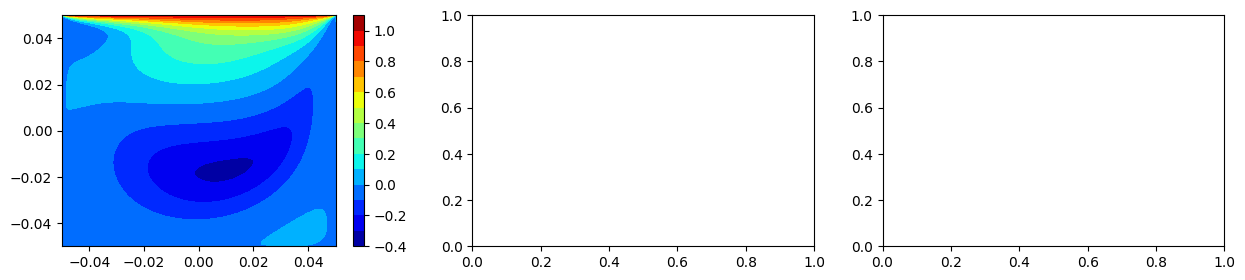

In [48]:
# plt.imshow()
# X, Y = np.meshgrid(data['x'].flatten(), data['y'].flatten())
# data['pred_u'].shape
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cp_u = axs[0].tricontourf(data['x'].flatten(), data['y'].flatten(), data['pred_u'].flatten(), levels=14)
fig.colorbar(cp_u) 
cp_u.set_cmap('jet')
cp_v = axs[0].tricontourf(data['x'].flatten(), data['y'].flatten(), data['pred_v'].flatten(), levels=14)
fig.colorbar(cp_v) 
cp_v.set_cmap('jet')
X, Y = np.meshgrid(data['x'].flatten(), data['y'].flatten())
u = data['u']
v = data['v']
cp = axs[0].streamplot(X, Y, u, v, linewidth=2, cmap='autumn')
fig.colorbar(cp) 
cp.lines.set_cmap('jet')

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(7.5, 6), sharey=False)

xlist = np.linspace(0., 1., N_plt)
ylist = np.linspace(0., 1., N_plt)
X, Y = np.meshgrid(xlist, ylist)
T = np.array([start_t] * X.size)
u, v, p = find_uvp(T, X, Y, N_plt)

N_resolution = 40
### Plot u ###
cp_u = axs[0, 0].contourf(X, Y, u, N_resolution)
fig.colorbar(cp_u) 
cp_u.set_cmap('jet')
axs[0, 0].set_title('Contours of $u$')
axs[0, 0].set_xlabel('$x$')
axs[0, 0].set_ylabel('$y$')

### Plot v ###
cp_v = axs[0, 1].contourf(X, Y, v, N_resolution)
fig.colorbar(cp_v) 
cp_v.set_cmap('jet')
axs[0, 1].set_title('Contours of $v$')
axs[0, 1].set_xlabel('$x$')
axs[0, 1].set_ylabel('$y$')

### Plot velocity field ###
strm = axs[1, 0].streamplot(X, Y, u, v, color=v, density=1.5, linewidth=1)
fig.colorbar(strm.lines)
strm.lines.set_cmap('jet')
axs[1, 0].set_title('Velocity stream traces' )
axs[1, 0].set_xlabel('$x$')
axs[1, 0].set_ylabel('$y$')

### Plot p ###
cp_p = axs[1, 1].contourf(X, Y, p, N_resolution)
fig.colorbar(cp_p) 
cp_p.set_cmap('jet')
axs[1, 1].set_title('Contours of $p$')
axs[1, 1].set_xlabel('$x$')
axs[1, 1].set_ylabel('$y$')

fig.tight_layout(pad=1.0)